In [19]:
 #import libraries
import numpy as np 
import pandas as pd
from IPython.display import display 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Data = pd.read_csv('C:/Users/user/Desktop/WorkAssign/PreScreen_r3/ingredient1.csv')

# Data Exploration 

In [20]:
 # view first 5 rows of the table
Data.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [21]:
 # view first 5 rows of the table
Data.tail()

,a,b,c,d,e,f,g,h,i
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.0,0.32
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.0,0.00
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.0,0.22
213,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.0,0.00


In [22]:
#check for missing values in the table; Thare are no missing value in the data.
Data.isnull().any() 

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
i    False
dtype: bool

In [23]:
#Analyze descriptive statistic; All the features in the table are in numerical form
Data.describe() 


,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


# Analyse discrete and continuous variable

In [24]:
#Check the occurance of discreet and continuous variables

variables = [var for var in Data.columns if Data[var].dtypes != 'O']

discrete_var = [var for var in variables if len(Data[var].unique())<20]

print('Number of discrete variables: ', len(discrete_var))


Number of discrete variables:  0


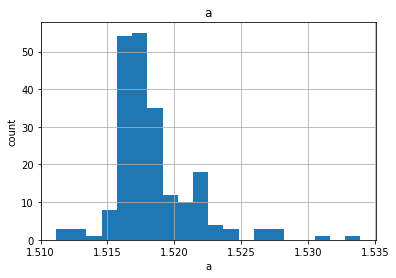

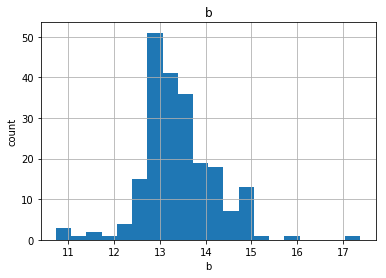

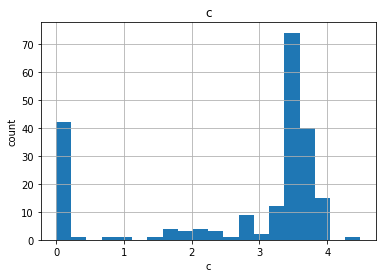

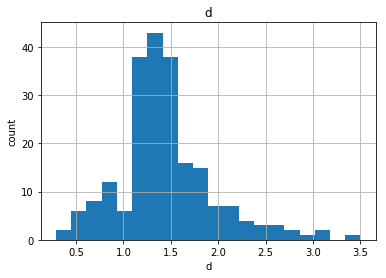

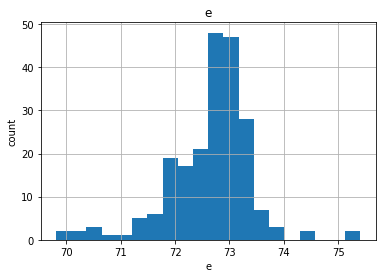

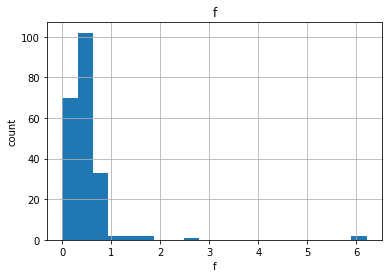

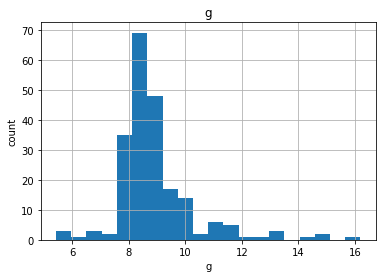

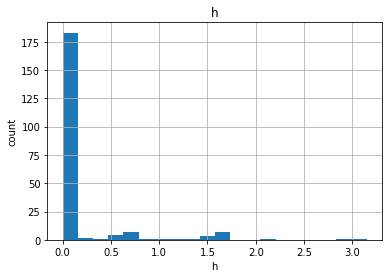

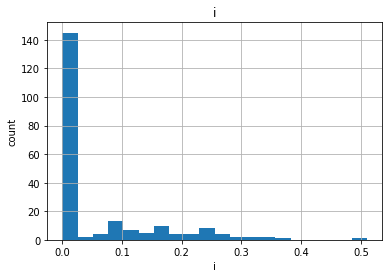

In [25]:
#View the distributation of the continuous variables using histogram

def continous_var(data, var):
    data = data.copy()
    data[var].hist(bins=20)
    plt.ylabel('count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in variables:
    continous_var(Data, var)

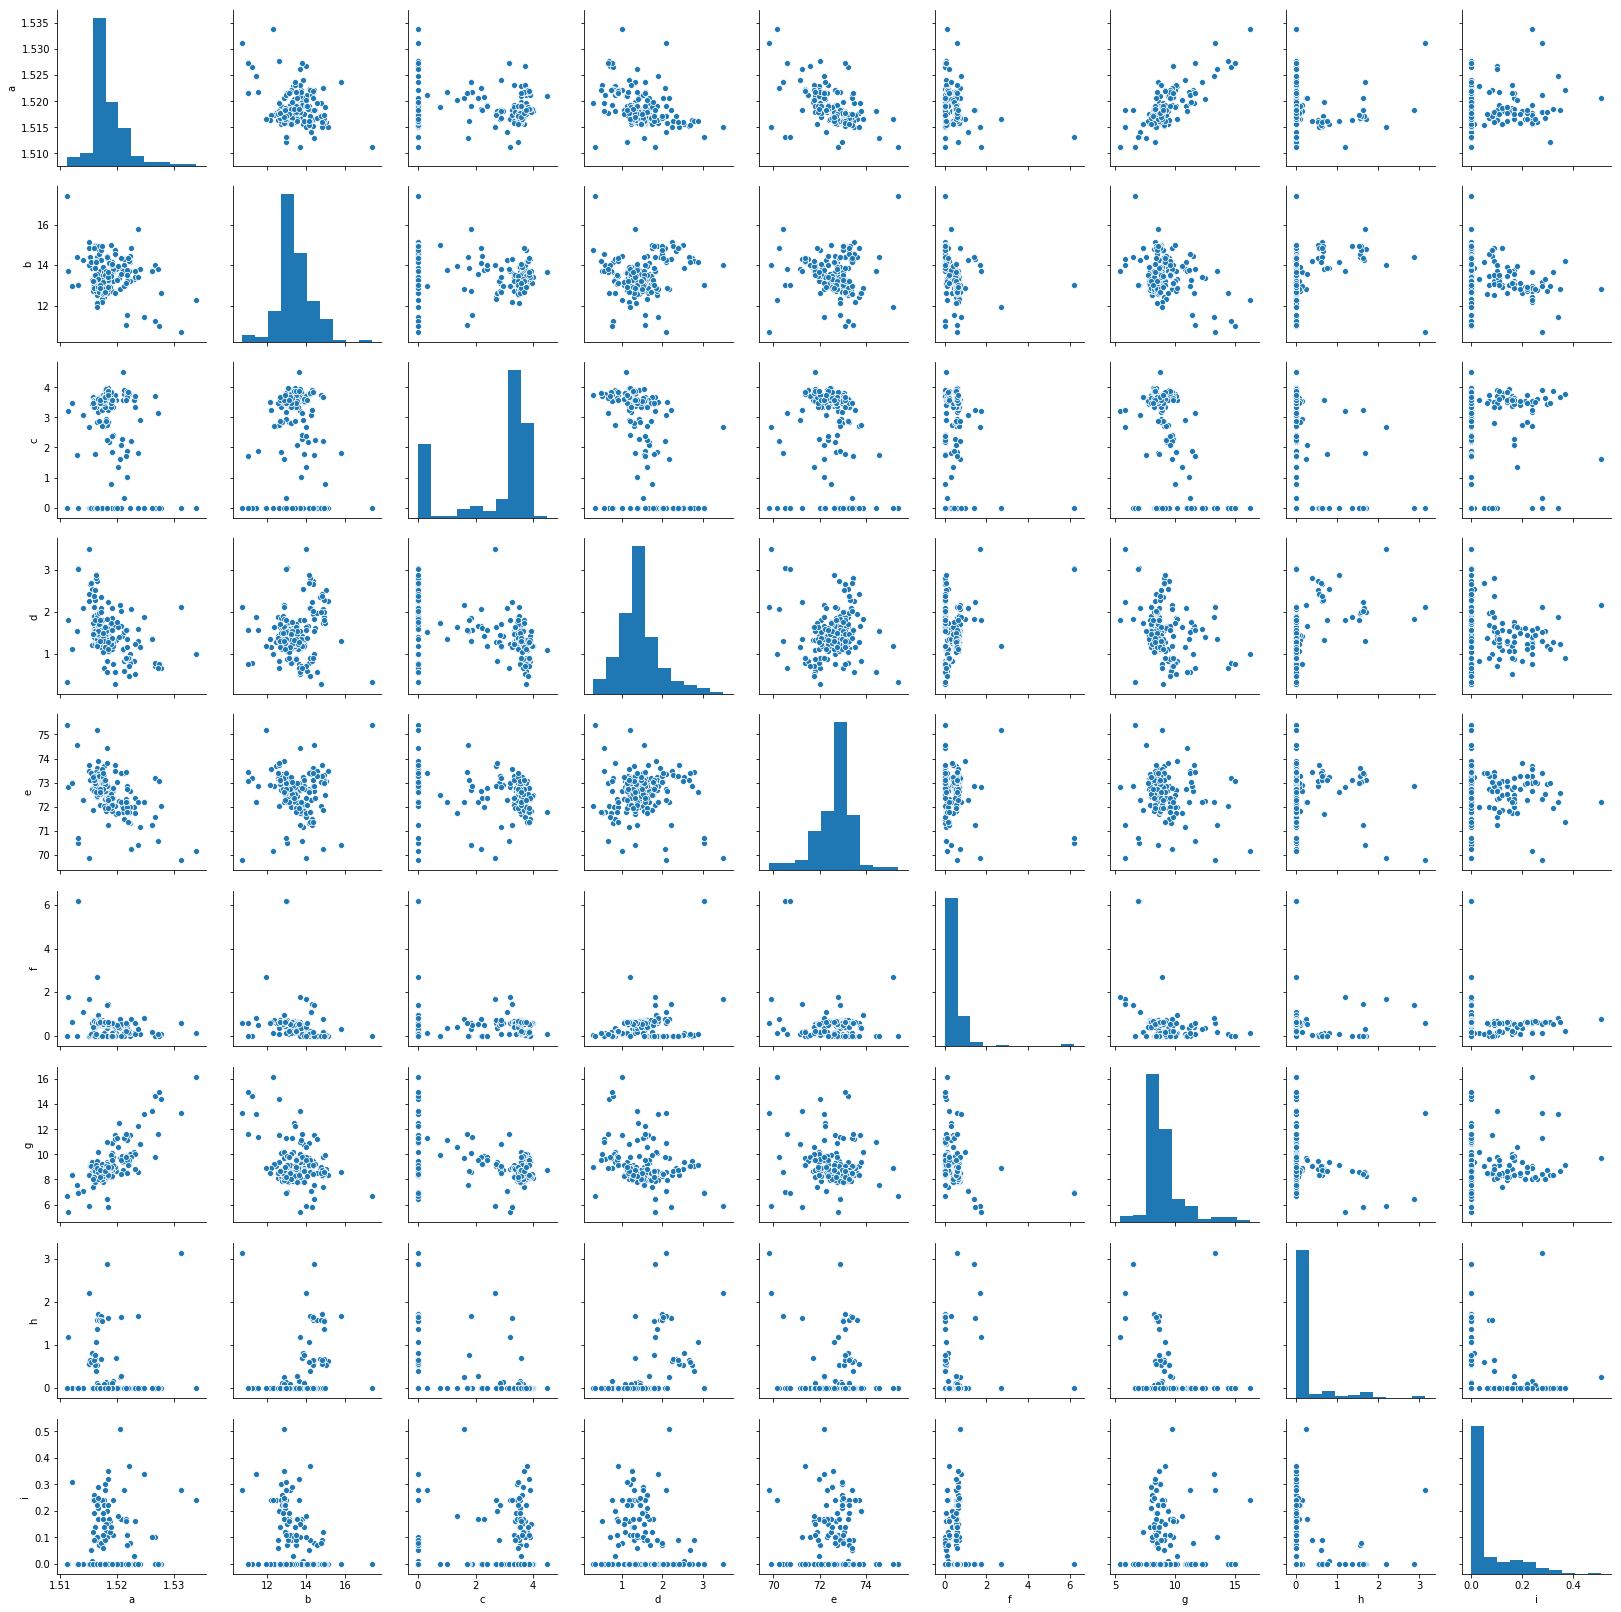

In [26]:
#View the relationships of the variables using pairplot
sns.pairplot(Data)
plt.show()

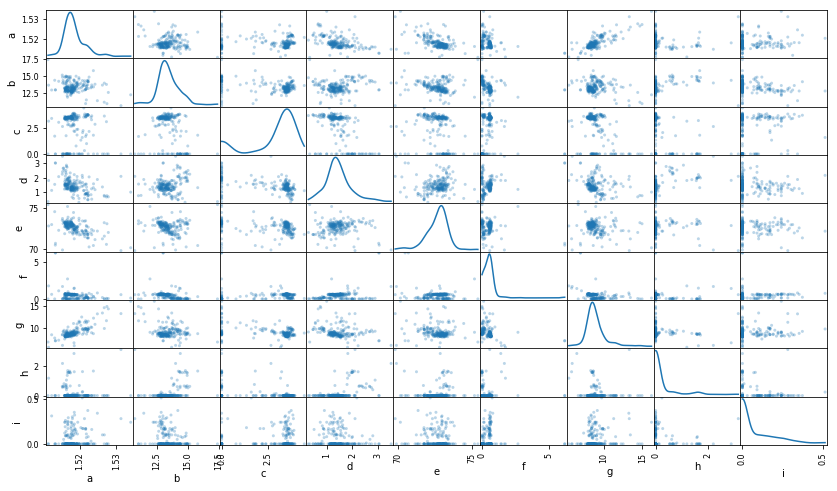

In [27]:
#View the Data distributation using scatterplot

from pandas.plotting import scatter_matrix
scatter_matrix(Data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

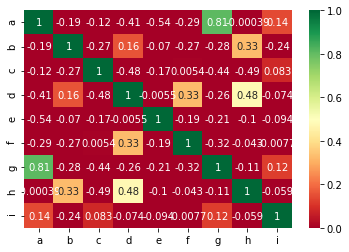

In [28]:
#View the data correlation using heatmap

import seaborn as sns
sns.heatmap(Data.corr(), vmin=0, vmax=1, annot=True, cmap='RdYlGn')

From the scatter plots and the heatmap of correlation, we can see that there is a strong correlation between the ‘a’ and ‘g’ features. The features ‘d’ and ‘h’ also show a good degree of correlation.

Feature 'c', 'e' and 'i' are selected as they have lower degree of correlation. In training a model, we need to reduce features used for training a model.

In [29]:
Df = Data[["c","e","i"]]
#Df = Data[["c","f","h","i"]]
#Df = Data

# Clustering

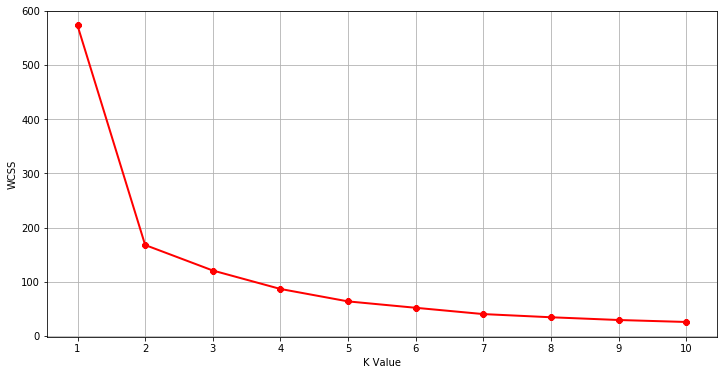

In [30]:
#Use elbow method to find the optimum number of clusters.

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(Df.iloc[:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. In the plot of WSS-versus k, this is visible as an elbow.

The optimal K value is found to be 3 using the elbow method.

In [31]:
#kmeans model

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(Df.iloc[:])

In [32]:
#convert the prediction array to pandas

Df['predictions1'] = pd.DataFrame(pred_y)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
#View teh first 5 rows

Df.head()

,c,e,i,predictions1
0,3.54,72.73,0.07,0
1,0.00,69.81,0.28,2
2,3.58,71.99,0.03,0
3,3.52,73.15,0.00,0
4,3.98,72.49,0.00,0


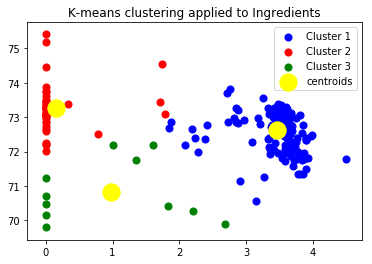

In [34]:
#visualize the clusters and their centroids 

plt.figure(2)
plt.scatter(Df.iloc[pred_y == 0, 0], Df.iloc[pred_y == 0, 1], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(Df.iloc[pred_y == 1, 0], Df.iloc[pred_y == 1, 1], s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(Df.iloc[pred_y == 2, 0], Df.iloc[pred_y == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroids' )
plt.title("K-means clustering applied to Ingredients")
plt.legend()
plt.show()